<a href="https://colab.research.google.com/github/theaok/linaColMex/blob/main/linaColMex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#---------------------------SETUP----------------------------------
#get useful libraries
import io, time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import urllib.request
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg
##https://www.marktechpost.com/2023/10/20/6-magic-commands-for-jupyter-notebooks-in-python-data-science/
#%%latex
#%ai
#%run
#%writefile
#%history -n

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

#sometimes have to install library which you get from https://pypi.org/
#!pip install geopandas

## quick comparison to wvs
this goes to prezentation too as first stab

In [9]:
wvs0 = pd.read_stata('http://theaok.github.io/junk/wvs.tar.bz2', convert_categoricals=False)

In [11]:
wvs.columns

Index(['S002VS', 'c', 'cc', 'S004', 'S006', 'S007', 'S010', 'S013', 'S013B',
       'S016',
       ...
       'cat', 'pro', 's_c', 'fair', 'famUns', 'hap', 'monSafHumIde', 'aut_ind',
       'myself', 'dec_mys'],
      dtype='object', length=189)

In [12]:
wvs = wvs0[wvs0['cc'].isin(['MEX', 'COL'])]
wvs.shape

(23796, 189)

In [27]:
#just to test CI
# Take a 5% random sample of the wvs DataFrame
wvs_sample = wvs.sample(frac=0.005, random_state=42)
wvs_sample.shape



(119, 189)

<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-2205655088.py:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(data=wvs, x='cc', y='ls', errorbar=('ci', 95),errwidth=1,err_kws={"color": "red"})


<Axes: xlabel='cc', ylabel='ls'>

Text(0.5, 1.0, 'Mean of variable "ls" by "cc" with 95% CI')

Text(0.5, 0, 'Country Code')

Text(0, 0.5, 'Mean of ls')

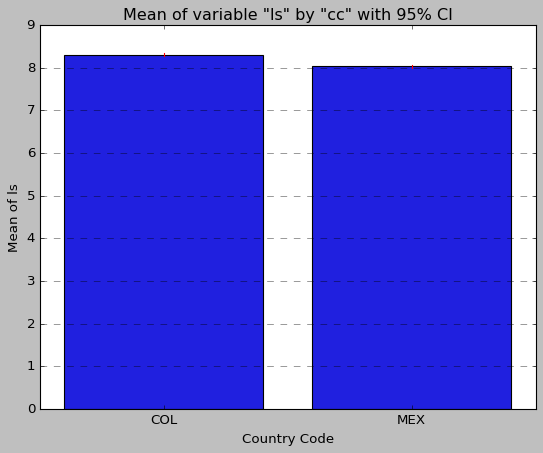

In [31]:
# Create the bar plot with 95% confidence intervals
plt.figure(figsize=(8, 6))
sns.barplot(data=wvs, x='cc', y='ls', errorbar=('ci', 95),errwidth=1,err_kws={"color": "red"})
plt.title('Mean of variable "ls" by "cc" with 95% CI')
plt.xlabel('Country Code')
plt.ylabel('Mean of ls')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 800x560 with 0 Axes>

<Axes: xlabel='cc', ylabel='value'>

Text(0.5, 1.0, 'Mean of "ls" and "satFin" by "cc" with 95% CI')

Text(0.5, 0, 'Country Code')

Text(0, 0.5, 'Mean Value')

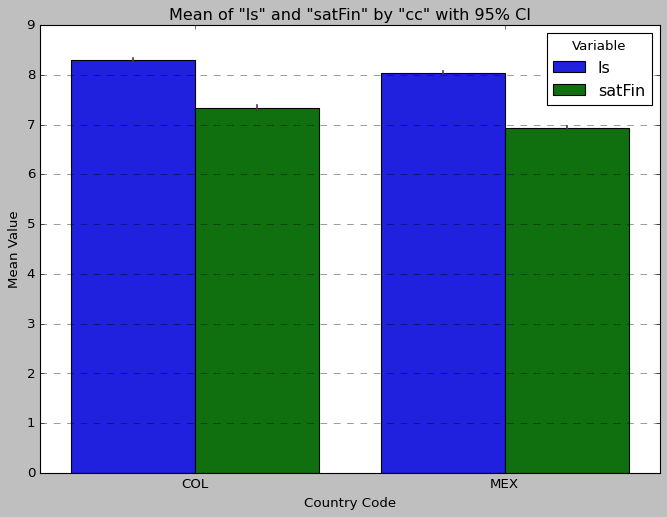

In [35]:
#do a bar graph with 95% CI of variables ls,hap,satFin,sts_dem,sts_gov by cc variable
#in one graph, without separate subplots where bars are next to each other

# Melt the DataFrame to long format for easier plotting of multiple variables
wvs_melted = pd.melt(wvs, id_vars=['cc'], value_vars=['ls', 'satFin'],
                     var_name='variable', value_name='value')

# Create a single bar plot with 95% confidence intervals, with bars next to each other
plt.figure(figsize=(10, 7))
sns.barplot(data=wvs_melted, x='cc', y='value', hue='variable', errorbar=('ci', 95))

plt.title('Mean of "ls" and "satFin" by "cc" with 95% CI')
plt.xlabel('Country Code')
plt.ylabel('Mean Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Variable')
plt.show()

both life satisfaction and financial satisfaction are sligtly higher in COL

<Figure size 800x560 with 0 Axes>

<Axes: xlabel='cc', ylabel='value'>

Text(0.5, 1.0, 'Mean of "ls" and "satFin" by "cc" with 95% CI')

Text(0.5, 0, 'Country Code')

Text(0, 0.5, 'Mean Value')

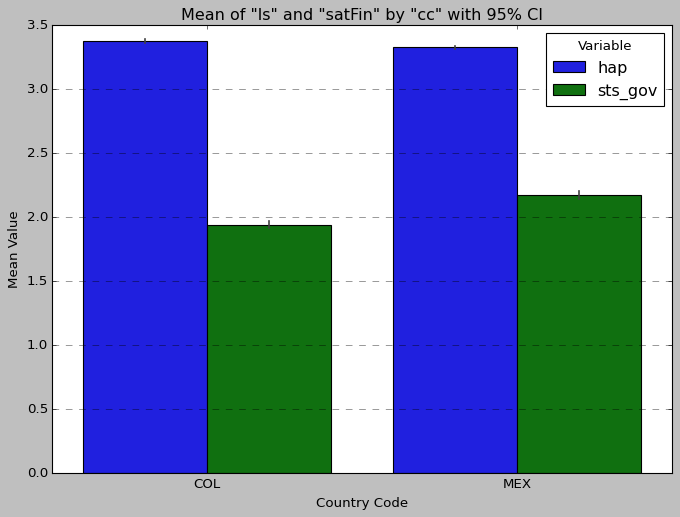

In [38]:
# Melt the DataFrame to long format for easier plotting of multiple variables
wvs_melted = pd.melt(wvs, id_vars=['cc'], value_vars=['hap', 'sts_gov'],
                     var_name='variable', value_name='value')

# Create a single bar plot with 95% confidence intervals, with bars next to each other
plt.figure(figsize=(10, 7))
sns.barplot(data=wvs_melted, x='cc', y='value', hue='variable', errorbar=('ci', 95))

plt.title('Mean of "ls" and "satFin" by "cc" with 95% CI')
plt.xlabel('Country Code')
plt.ylabel('Mean Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Variable')
plt.show()

happiness slightly higher in COL; satisfaction with govt higher in MEX

#enbiare y ecv

ADD to SLIDES:

We use very large n=?? And broad data: hundreds of variables in over 10 modules that are almost unused in academic research as compared to WVS or Gallup with sample size of few thousand, so 50-100x smaller than our data


## col


TODO:

are these representative of departments?

just do a quick paper for ariq with maps of more interesting satisfactions like 3-5 by dept or for now i guess just lifests

In [120]:
#https://microdatos.dane.gov.co/index.php/catalog/734
zip_url = 'https://github.com/theaok/linaColMex/raw/refs/heads/main/Caracteristicas%20y%20composicion%20del%20hogar.zip'
with urllib.request.urlopen(zip_url) as response: zip_content = response.read() # Fetch content
# Open the ZIP file
with zipfile.ZipFile(io.BytesIO(zip_content), 'r') as zf:
    # List files in the archive to ensure we have the correct name
    # print(zf.namelist())
    # Read the specific file from the ZIP archive
    with zf.open('Caracteristicas y composicion del hogar.dta') as dta_file:
        chaComHog = pd.read_stata(dta_file)
        #with pd.io.stata.StataReader(dta_file) as reader:
        #  variable_labels = reader.variable_labels()
        #  print("Variable Labels:")
        #  print(variable_labels)
chaComHog.columns

Index(['directorio', 'secuencia_encuesta', 'secuencia_p', 'orden', 'fex_c',
       'p6016', 'p1894', 'p6020', 'p6034', 'p6040', 'p6051', 'p5502', 'p6071',
       'p6071s1', 'p756', 'p756s1', 'p756s2', 'p756s3', 'p6074', 'p755',
       'p755s1', 'p755s2', 'p755s3', 'p754', 'p753', 'p753s1', 'p753s2',
       'p753s3', 'p752', 'p1662', 'p6081', 'p6081s1', 'p6087', 'p6083',
       'p6083s1', 'p6088', 'p6080', 'p5667', 'p2057', 'p2059', 'p2061',
       'p1895', 'p1896', 'p1897', 'p1898', 'p1899', 'p3175', 'p1901', 'p1903',
       'p1904', 'p1905', 'p1927'],
      dtype='object')

In [48]:
pd.set_option('display.max_rows', None)
chaComHog['p756s2'].value_counts(dropna=False)

,count
p756s2,
NaN,176811
11001.0,5337
50001.0,1657
76001.0,1542
8001.0,1490
5001.0,1330
68001.0,1103
18001.0,1082
63001.0,983


In [121]:
chaComHog.p1896.value_counts(dropna=False)

,count
p1896,
NaN,61895
99.0,34928
8.0,30885
7.0,28073
6.0,21956
5.0,20056
10.0,15356
9.0,13510
4.0,10626


later:

p756s2 is city! but 176k missing

¿Siempre ha vivido aquí en este municipio? (P6074) yes no

¿Dónde vivía ..., hace 5 años? (P755) this town, other

¿a cuál pueblo o etnia indígena pertenece _____? (P5667) anpther indigenous

¿Usted se considera campesino(a)? (P2057) yet another one; and few subsequent ones


after life satisfaction there are like 10vars about other domains and depression etc



In [153]:
#https://microdatos.dane.gov.co/index.php/catalog/734/data-dictionary/F3?file_name=Caracteristicas%20y%20composicion%20del%20hogar
chaComHog.rename(columns={
    'p6020': 'gender',
    'p6051': 'hh head',
    'p6080': 'eth',
    'p2057': 'farmer',
    'p756' : 'born where',
    'p756s1': 'department',
    'p1895': 'life satisfaction',
    'p1896': 'income satisfaction',
    'p1897': 'health satisfaction',
    'p1898': 'safety satisfaction',
    'p1899': 'work/activity satisfaction',
    'p3175': 'free time satisfaction',
    'p1901': 'happy yesterday',
    'p1903': 'worried yesterday',
    'p1904': 'sad yesterday',
    'p1905': 'things do in life worthwhile',
    'p1927': 'cantril ladder'
    }, inplace=True)
chaComHog.columns

Index(['directorio', 'secuencia_encuesta', 'secuencia_p', 'orden', 'fex_c',
       'p6016', 'p1894', 'gender', 'p6034', 'p6040', 'hh head', 'p5502',
       'p6071', 'p6071s1', 'born where', 'department', 'p756s2', 'p756s3',
       'p6074', 'p755', 'p755s1', 'p755s2', 'p755s3', 'p754', 'p753', 'p753s1',
       'p753s2', 'p753s3', 'p752', 'p1662', 'p6081', 'p6081s1', 'p6087',
       'p6083', 'p6083s1', 'p6088', 'eth', 'p5667', 'farmer', 'p2059', 'p2061',
       'life satisfaction', 'income satisfaction', 'health satisfaction',
       'safety satisfaction', 'work/activity satisfaction',
       'free time satisfaction', 'happy yesterday', 'worried yesterday',
       'sad yesterday', 'things do in life worthwhile', 'cantril ladder'],
      dtype='object')

In [51]:
#chaComHog

In [52]:
#labels hack with dict
lab = {
  "hh head": '''Cuál es el parentesco de....con el jefe o la jefa de este hogar?
1 Jefe (a) del hogar
2 Pareja, esposo (a), cónyuge, compañero(a)
3 Hijo(a) hijastro(a)
4 Nieto (a)
5 Padre, madre, padrastro y madrastra
6 Suegro o suegra
7 Hermano (a), hermanastro (a)
8 Yerno, nuera
9 Otro pariente del jefe(a)
10 Empleado(a) del servicio doméstico
11 Parientes del servicio doméstico
12 Trabajador
13 Pensionista
14 Otro pariente''',
  "eth" : '''De acuerdo con su cultura, pueblo o rasgos físicos, _____ es o se reconoce comó:
1 Indígena
2 Gitano (a) (Rom)
3 Raizal del archipiélago de San Andrés, Providencia y Santa Catalina
4 Palenquero (a) de San Basilio
5 Negro (a), mulato (a) (afrodescendiente), afrocolombiano(a)
6 Ninguno de los anteriores''',
  "farmer" : '''¿Usted se considera campesino(a)?
1 Si
2 No
3 No informa''',
  "born where": '''¿Dónde nació ________?
1- En este municipio
2- En otro municipio
3- En otro país''',
  "department": '''Departamento de nacimiento; Registre el lugar de nacimiento de la persona encuestada.
  Si la persona indica que nació en otro municipio (o país) por razones médicas u otra razón externa,
  considere como lugar de nacimiento de la persona el lugar de residencia de la madre al momento del nacimiento.''',
  "life satisfaction": '''En general, qué tan satisfecho(a) se siente ... con su vida actualmente?
  0 Totalmente insatisfecho(a) - 10 Totalmente satisfecho(a)''',
  "income satisfaction": '''En general, qué tan satisfecho(a) se siente ... con su ingreso actual?
   0 Totalmente insatisfecho(a) - 10 Totalmente satisfecho(a)''',
  "health satisfaction": '''En general, qué tan satisfecho(a) se siente ... con su salud actualmente?
  0 Totalmente insatisfecho(a) - 10 Totalmente satisfecho(a)''',
  "safety satisfaction": '''En general, qué tan satisfecho(a) se siente ... con su nivel de seguridad actualmente?
  0 Totalmente insatisfecho(a) - 10 Totalmente satisfecho(a)''',
  "work/activity satisfaction": '''En general, qué tan satisfecho(a) se siente ... con su trabajo/actividad actualmente?
  0 Totalmente insatisfecho(a) - 10 Totalmente satisfecho(a)''',
  "free time satisfaction": '''En general, ¿qué tan satisfecho/a se siente _____ con su tiempo libre?
  0 Totalmente insatisfecho(a) - 10 Totalmente satisfecho(a)''',
  "happy yesterday": '''¿Qué tan feliz se sintió ... el día de ayer?
  0 Para nada feliz - 10 Todo el tiempo feliz''',
  "worried yesterday": '''¿Qué tan preocupado(a) se sintió ... el día de ayer?
  0 Para nada preocupado(a) - 10 Todo el tiempo preocupado(a)''',
  "sad yesterday": '''¿Qué tan triste se sintió ... el día de ayer?
  0 Para nada triste - 10 Todo el tiempo triste''',
  "things do in life worthwhile": '''Qué tanto considera ... que las cosas que hace en su vida valen la pena?
  0 No valen la pena - 10 Valen totalmente la pena''',
  "cantril ladder": '''¿En cuál escalón diría usted que se encuentra parado(a) en este momento?
  0 Peor vida - 10 Mejor vida'''
}
print(lab["life satisfaction"])

En general, qué tan satisfecho(a) se siente ... con su vida actualmente?
  0 Totalmente insatisfecho(a) - 10 Totalmente satisfecho(a)


In [132]:
chaComHog['income satisfaction'].replace(99, np.nan, inplace=True)
chaComHog['life satisfaction'].replace(99, np.nan, inplace=True)

/tmp/ipython-input-2141462605.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chaComHog['income satisfaction'].replace(99, np.nan, inplace=True)
/tmp/ipython-input-2141462605.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [133]:
chaComHog[['income satisfaction']].value_counts(dropna=False)

,count
income satisfaction,
NaN,96823
8.0,30885
7.0,28073
6.0,21956
5.0,20056
10.0,15356
9.0,13510
4.0,10626
3.0,8350


In [54]:
#assign names to numeric codes of departments in colombia based on variable department
department_mapping = {
    5: 'Antioquia',
    11: 'Bogotá, D.C.',
    76: 'Valle del Cauca',
    15: 'Boyacá',
    73: 'Tolima',
    25: 'Cundinamarca',
    68: 'Santander',
    50: 'Meta',
    17: 'Caldas',
    41: 'Huila',
    52: 'Nariño',
    18: 'Caquetá',
    54: 'Norte de Santander',
    19: 'Cauca',
    13: 'Bolívar',
    8: 'Atlántico',
    23: 'Córdoba',
    63: 'Quindío',
    47: 'Magdalena',
    85: 'Casanare',
    66: 'Risaralda',
    70: 'Sucre',
    20: 'Cesar',
    86: 'Putumayo',
    81: 'Arauca',
    27: 'Chocó',
    44: 'La Guajira',
    95: 'Guaviare',
    99: 'Vichada',
    91: 'Amazonas',
    94: 'Guainía',
    97: 'Vaupés',
    88: 'San Andrés y Providencia',
    # Add other mappings here as per official data
}

In [55]:
chaComHog['department_name'] = chaComHog['department'].map(department_mapping)
chaComHog['department_name'].value_counts(dropna=False)

,count
department_name,
NaN,176811
Antioquia,6036
"Bogotá, D.C.",5337
Valle del Cauca,5268
Boyacá,4638
Tolima,4257
Cundinamarca,4233
Santander,4153
Meta,3862


In [56]:
mean_life_satisfaction_by_department = chaComHog.groupby('department_name')['life satisfaction'].mean().dropna().round(1)
display(mean_life_satisfaction_by_department.sort_values(ascending=False))

,life satisfaction
department_name,
Quindío,8.4
Risaralda,8.3
Antioquia,8.3
Norte de Santander,8.2
Caldas,8.2
San Andrés y Providencia,8.2
Bolívar,8.1
"Bogotá, D.C.",8.1
Arauca,8.1


In [57]:
#calculate mean life satisfaction by the department name in one column and round to 1 decimal point, and in another column show number of observations; and finally in the last column show number of observations that are not missing on life satisfaction variable
department_summary = chaComHog.groupby('department_name')['life satisfaction'].agg(['mean', 'size', 'count']).dropna()
department_summary = department_summary.rename(columns={
    'mean': 'mean_life_satisfaction',
    'size': 'total_observations',
    'count': 'non_missing_life_satisfaction'
})
department_summary['mean_life_satisfaction'] = department_summary['mean_life_satisfaction'].round(1)
display(department_summary.sort_values(by='mean_life_satisfaction', ascending=False))

,mean_life_satisfaction,total_observations,non_missing_life_satisfaction
department_name,,,
Quindío,8.4,2186,1785
Risaralda,8.3,1996,1663
Antioquia,8.3,6036,5060
Norte de Santander,8.2,2587,2171
Caldas,8.2,3335,3005
San Andrés y Providencia,8.2,29,26
Bolívar,8.1,2495,2156
"Bogotá, D.C.",8.1,5337,3810
Arauca,8.1,1103,868


aha Quindío is Armenia area--caffetero happy!

<Axes: >

Text(0.5, 1.0, 'Mean Life Satisfaction by Department in Colombia (2020)')

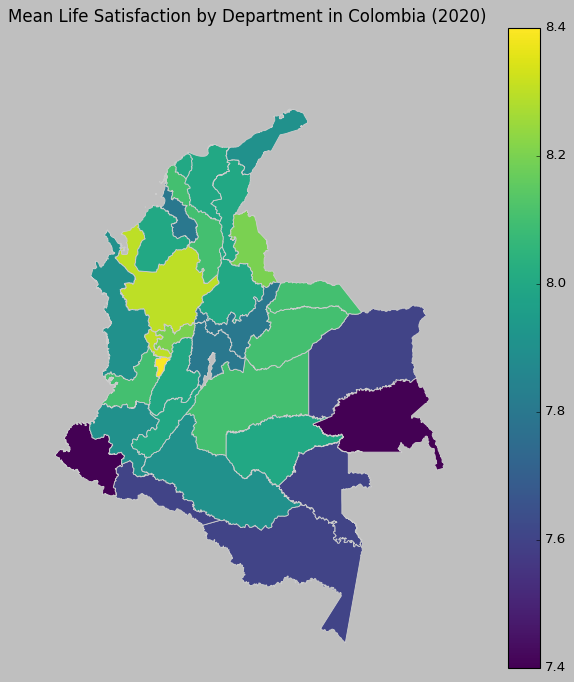

In [58]:
#make a geopandas map of 'mean_life_satisfaction' by 'department_name'
# but had to point to specific shapefile it coundnt find it had to goog it first
#https://data.humdata.org/dataset/geoboundaries-admin-boundaries-for-colombia
#https://github.com/wmgeolab/geoBoundaries/raw/9469f09/releaseData/gbOpen/COL/ADM1/geoBoundaries-COL-ADM1_simplified.geojson
import requests

geoj_url = 'https://github.com/wmgeolab/geoBoundaries/raw/9469f09/releaseData/gbOpen/COL/ADM1/geoBoundaries-COL-ADM1_simplified.geojson'
response = requests.get(geoj_url)
colombia_departments_geojson = response.json()

import geopandas
colombia_gdf = geopandas.GeoDataFrame.from_features(colombia_departments_geojson['features'])
merged_gdf = colombia_gdf.set_index('shapeName').merge(department_summary, left_index=True, right_index=True, how='left') #TODO check ls vals with table; not sure about AI merge

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_gdf.plot(column='mean_life_satisfaction', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mean Life Satisfaction by Department in Colombia (2020)', fontsize=15)
ax.set_axis_off()
plt.show()
#south and west unhappy! big diff! 7.4 to 8.4!!!
#TODO think about bins and describe nicely like there is this south-west unhappy belt!!

#TODO: another paper yes right away with these
# HumanFlourishingGeographicIndexUSA2013-2023
# https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/T39JBY

### munis

In [59]:
#match municipality codes from variable p756s2 with municipality names and show both side by size along with average on life satisfaction on that variable; only show municipalities with at least 500 observations
municipality_mapping = {
    11001.0: 'Bogotá, D.C.',
    50001.0: 'Villavicencio',
    76001.0: 'Cali',
    8001.0: 'Barranquilla',
    5001.0: 'Medellín',
    68001.0: 'Bucaramanga',
    18001.0: 'Florencia',
    63001.0: 'Armenia',
    66001.0: 'Pereira',
    54001.0: 'Cúcuta',
    73001.0: 'Ibagué',
    17001.0: 'Manizales',
    85001.0: 'Yopal',
    13001.0: 'Cartagena',
    41001.0: 'Neiva',
    70001.0: 'Sincelejo',
    41551.0: 'Pitalito',
    23001.0: 'Montería',
    15759.0: 'Sogamoso',
    50313.0: 'Acacías',
    52001.0: 'Pasto',
    15001.0: 'Tunja',
    95001.0: 'San José del Guaviare',
    76834.0: 'Tuluá',
    20001.0: 'Valledupar',
    76520.0: 'Palmira',
    19001.0: 'Popayán',
    47001.0: 'Santa Marta',
    76147.0: 'Buenaventura',
    47189.0: 'Ciénaga',
    63130.0: 'Calarcá',
    81736.0: 'Saravena',
    25307.0: 'Facatativá',
    20011.0: 'Aguachica',
    68081.0: 'Barrancabermeja',
    81001.0: 'Arauca',
    86568.0: 'Puerto Asís',
    73168.0: 'Espinal',
    99773.0: 'Puerto Carreño',
    13430.0: 'Magangué',
    18592.0: 'San Vicente del Caguán',
    5045.0: 'Envigado',
    41298.0: 'Garzón',
    17380.0: 'La Dorada',
    73268.0: 'Flandes',
    70215.0: 'Corozal',
    54498.0: 'Ocaña',
    73411.0: 'Mariquita',
    76736.0: 'Buga',
    25269.0: 'Zipaquirá',
    17174.0: 'Chinchiná',
    25899.0: 'Soacha',
    17614.0: 'Riosucio',
    94001.0: 'Inírida',
    44430.0: 'Maicao',
    50006.0: 'Granada',
    81794.0: 'Tame',
    5615.0: 'Bello',
    85430.0: 'Villanueva',
    76109.0: 'Cartago',
    27001.0: 'Quibdó',
    85250.0: 'Aguazul',
    97001.0: 'Mitú',
    15238.0: 'Chiquinquirá',
    44001.0: 'Riohacha',
    52835.0: 'Tumaco',
    47245.0: 'Fundación',
    52356.0: 'Ipiales',
    63470.0: 'Montenegro',
    15176.0: 'Duitama',
    8638.0: 'Malambo',
    47551.0: 'Plato',
    50573.0: 'Puerto López',
    25175.0: 'Cajicá',
    17653.0: 'Salamina',
    23417.0: 'Lorica',
    23660.0: 'Sahagún',
    17042.0: 'Anserma',
    86001.0: 'Mocoa',
    13244.0: 'El Carmen de Bolívar',
    41396.0: 'La Plata',
    50689.0: 'San Martín',
    47288.0: 'Aracataca',
    18247.0: 'El Doncello',
    23555.0: 'Planeta Rica',
    19698.0: 'Santander de Quilichao',
    18753.0: 'Puerto Rico',
    76122.0: 'Buenaventura',
    5579.0: 'Itagüí',
    47555.0: 'Pivijay',
    76113.0: 'Candelaria',
    63594.0: 'Tebaida',
    8758.0: 'Puerto Colombia',
    19100.0: 'Cajibío',
    17013.0: 'Aguadas',
    19256.0: 'Guachené',
    25438.0: 'Girardot',
    13468.0: 'Mompós',
    66400.0: 'Dosquebradas',
    73624.0: 'San Luis',
    68679.0: 'San Vicente de Chucurí',
    25290.0: 'Fusagasugá',
    70708.0: 'Sincé',
    5837.0: 'Rionegro',
    73504.0: 'Purificación',
    68615.0: 'Socorro',
    86219.0: 'Puerto Caicedo',
    18860.0: 'Solano',
    68861.0: 'Vélez',
    76111.0: 'Florida',
    18205.0: 'Curillo',
    23807.0: 'San Pelayo',
    18094.0: 'Cartagena del Chairá',
    70713.0: 'Tolú',
    54518.0: 'Pamplona',
    66682.0: 'Santa Rosa de Cabal',
    73555.0: 'Saldaña',
    17662.0: 'Supía',
    68276.0: 'Floridablanca',
    99524.0: 'Inírida',
    68101.0: 'Barichara',
    73349.0: 'Honda',
    20013.0: 'Bosconia',
    85230.0: 'Paz de Ariporo',
    99001.0: 'Puerto Inírida',
    15572.0: 'Paipa',
    73283.0: 'Líbano',
    68755.0: 'Puerto Wilches',
    23162.0: 'Cereté',
    17513.0: 'Marmato',
    23670.0: 'San Antero',
    73585.0: 'Chaparral',
    63401.0: 'La Tebaida',
    73124.0: 'Coyaima',
    18460.0: 'Morelia',
    68689.0: 'Sipí',
    15455.0: 'Garagoa',
    44847.0: 'Uribia',
    5034.0: 'Apartadó',
    15667.0: 'Ramiriquí',
    52678.0: 'Sandoná',
    66594.0: 'Quinchía',
    17541.0: 'Neira',
    54206.0: 'Cúcuta (El Zulia)',
    86865.0: 'Villagarzón',
    44650.0: 'San Juan del Cesar',
    23466.0: 'Momil',
    18256.0: 'El Paujil',
    73319.0: 'Guamo',
    85010.0: 'Aguazul',
    76275.0: 'Jamundí',
    5360.0: 'Bello (Copacabana)',
    86573.0: 'Santiago',
    41020.0: 'Aipe',
    73616.0: 'Roncesvalles',
    17486.0: 'Manzanares',
    63190.0: 'Génova',
    73483.0: 'Natagaima',
    41006.0: 'Algeciras',
    81065.0: 'Cravo Norte',
    91540.0: 'Puerto Nariño',
    17433.0: 'Marulanda',
    17050.0: 'Aranzazu',
    52079.0: 'Aldana',
    15469.0: 'Guateque',
    73055.0: 'Ataco',
    18410.0: 'La Montañita',
    18150.0: 'Curillo',
    5088.0: 'Puerto Gaitán',
    19517.0: 'Miranda',
    5154.0: 'Apartadó (Carepa)',
    5887.0: 'Marinilla',
    66088.0: 'Balboa',
    85440.0: 'Yopal (Tauramena)',
    25513.0: 'La Calera',
    19450.0: 'Mercaderes',
    17524.0: 'Marquetalia',
    86571.0: 'San Francisco',
    15753.0: 'Sácama',
    95025.0: 'Calamar',
    41132.0: 'Campoalegre',
    81591.0: 'Puerto Rondón',
    47058.0: 'Ariguaní (El Difícil)',
    50711.0: 'Vista Hermosa',
    19532.0: 'Morales',
    63302.0: 'Circasia',
    63548.0: 'Quimbaya',
    5756.0: 'Donmatías',
    5051.0: 'Apartadó (Chigorodó)',
    19573.0: 'Páez (Belalcázar)',
    54128.0: 'Cúcuta (Cachirá)',
    54810.0: 'Villa del Rosario',
    17616.0: 'Risaralda',
    13744.0: 'Turbaco',
    52260.0: 'El Tambo',
    50568.0: 'Puerto Lleras',
    18756.0: 'San José del Fragua',
    76233.0: 'Ginebra',
    52250.0: 'El Peñol',
    20175.0: 'Codazzi',
    25843.0: 'Tocancipá',
    50226.0: 'Castilla la Nueva',
    41306.0: 'Gigante',
    20228.0: 'Curumaní',
    86885.0: 'Valle del Guamuez',
    25151.0: 'Chía',
    73443.0: 'Ortega',
    54245.0: 'Chinácota',
    91001.0: 'Leticia',
    20710.0: 'La Paz',
    76895.0: 'Yumbo',
    73067.0: 'Cajamarca',
    15135.0: 'Boavita',
    50606.0: 'Puerto Concordia',
    50318.0: 'Cubarral',
    5172.0: 'Andes',
    86320.0: 'Orito',
    66440.0: 'La Virginia',
    5890.0: 'San Carlos'
    # Add more municipality codes and names here as needed from the DANE data dictionary
}
print("Comprehensive municipality mapping dictionary initialized.")

Comprehensive municipality mapping dictionary initialized.


In [60]:
chaComHog['municipality_name'] = chaComHog['p756s2'].map(municipality_mapping)

municipality_summary = chaComHog.groupby('municipality_name')['life satisfaction'].agg(['mean', 'count'])
municipality_summary = municipality_summary.rename(columns={
    'mean': 'mean_life_satisfaction',
    'count': 'non_missing_life_satisfaction'
})
municipality_summary['mean_life_satisfaction'] = municipality_summary['mean_life_satisfaction'].round(1)
#municipality_summary
filtered_municipality_summary_300 = municipality_summary[municipality_summary['non_missing_life_satisfaction'] >= 300]
display(filtered_municipality_summary_300.sort_values(by='mean_life_satisfaction', ascending=False))

,mean_life_satisfaction,non_missing_life_satisfaction
municipality_name,,
Armenia,8.5,674
Manizales,8.4,565
Medellín,8.4,957
Cartagena,8.4,565
Tuluá,8.4,307
Pereira,8.3,675
Cúcuta,8.3,547
Buenaventura,8.2,438
Villavicencio,8.2,963


ha both armenia and manizales are the top!

TODO merge with size and density and do scatterplot; provinces maybe too!

## mex

In [135]:
#https://www.inegi.org.mx/programas/enbiare/2021/#microdatos one page
#https://www.inegi.org.mx/rnm/index.php/catalog/730/data-dictionary more detailed
#mex=pd.read_csv('https://www.inegi.org.mx/contenidos/programas/enbiare/2021/microdatos/enbiare_2021_base_de_datos_csv.zip')
#['THOGAR.csv', 'TSDEM.csv', 'TVIVIENDA.csv', 'TENBIARE.csv']

zip_url_mex = 'https://www.inegi.org.mx/contenidos/programas/enbiare/2021/microdatos/enbiare_2021_base_de_datos_csv.zip'
with urllib.request.urlopen(zip_url_mex) as response:
    zip_content_mex = response.read() # Fetch content

with zipfile.ZipFile(io.BytesIO(zip_content_mex), 'r') as zf:
    # Read the specific file 'TENBIARE.csv' from the ZIP archive
    with zf.open('TENBIARE.csv') as csv_file_mex:
        tenbiare = pd.read_csv(csv_file_mex)

In [34]:
tenbiare.columns.to_list()

['FOLIO',
 'VIV_SEL',
 'HOGAR',
 'N_REN',
 'PA1',
 'PA2',
 'PA3_01',
 'PA3_02',
 'PA3_03',
 'PA3_04',
 'PA3_05',
 'PA3_06',
 'PA3_07',
 'PA3_08',
 'PA3_09',
 'PA3_10',
 'PA3_11',
 'PA3_12',
 'PA3_13',
 'PA3_14',
 'PA3_15',
 'PA3_16',
 'PA3_17',
 'PA4_01',
 'PA4_02',
 'PA4_03',
 'PA4_04',
 'PA4_05',
 'PA4_06',
 'PA4_07',
 'PA4_08',
 'PA4_09',
 'PA4_10',
 'PA5',
 'PA6',
 'PB1_01',
 'PB1_02',
 'PB1_03',
 'PB1_04',
 'PB1_05',
 'PB1_06',
 'PB1_07',
 'PB1_08',
 'PB1_09',
 'PB1_10',
 'PB1_11',
 'PB1_12',
 'PB2_1',
 'PB2_2',
 'PC1_1',
 'PC1_2',
 'PC1_3',
 'PC1_4',
 'PC1_5',
 'PC1_6',
 'PC1_7',
 'PC2_1',
 'PC2_2',
 'PC2_3',
 'PC2_4',
 'PC2_5',
 'PC3_1',
 'PC3_2',
 'PC3_3',
 'PC3_4',
 'PC3_5',
 'PC3_6',
 'PC3_7',
 'PC3_8',
 'PC4_1',
 'PC4_2',
 'PD1_1',
 'PD1_2',
 'PD1_3',
 'PD1_4',
 'PD1_5',
 'PD1_6',
 'PD2_1',
 'PD2_2',
 'PD2_3',
 'PD2_4',
 'PD2_5',
 'PD2_6',
 'PD2_7',
 'PD3_1',
 'PD3_2',
 'PE1',
 'PE2',
 'PE3',
 'PE4',
 'PE5',
 'PE6',
 'PE7',
 'PE8',
 'PE9',
 'PE10_1',
 'PE10_2',
 'PE10_3',
 '

In [183]:
tenbiare.PA5.value_counts(dropna=False)

,count
PA5,
8,8849
10,5792
9,5376
7,4838
6,2357
5,2335
4,656
3,414
2,258


In [184]:
#https://www.inegi.org.mx/rnm/index.php/catalog/730/data-dictionary/F20?file_name=TENBIARE
tenbiare.rename(columns={
    'PA1': 'life satisfaction',
    'PA3_01': 'standard of living satisfaction',
    'PA3_02': 'health satisfaction',
    'PA3_09': 'free time amount satisfaction',
    'PA3_11': 'public safety satisfaction',
    'PA3_12': 'work/activity satisfaction',
    'PA5':    'cantril ladder'
    }, inplace=True)
#tenbiare.columns

there is more than col like 17 satisfactions; just matching col for now

there is a  bunch of worried sad depressed but dont match exactly col

In [166]:
#select all vars with satis
tenbiare.filter(like='satis').columns.to_list()

['life satisfaction', 'standard of living satisfaction', 'health satisfaction']

In [137]:
tenbiare['standard of living satisfaction'].value_counts(dropna=False)

,count
standard of living satisfaction,
8,7123
10,6085
9,5297
7,4446
5,3000
6,2544
4,935
3,744
2,463


PA2 Y hace un año, ¿qué tan satisfecha(o) se encontraba con su vida?

In [181]:
#labels hack with dict
labM = {
  "life satisfaction": '''Podría decirme, en esa escala de 0 a 10, ¿qué tan satisfecho(a) se encuentra actualmente con su vida?''',
  "standard of living satisfaction": '''Las siguientes preguntas se refieren a su satisfacción con algunos aspectos específicos.
  ¿Qué tan satisfecho está con su nivel de vida (socioeconómico)? [0-10]''',
  "health satisfaction": '''Las siguientes preguntas se refieren a su satisfacción con algunos aspectos específicos.
  ¿Qué tan satisfecho está con su salud? [0-10]''',
  "free time amount satisfaction": '''Las siguientes preguntas se refieren a su satisfacción con algunos aspectos específicos.
  ¿Qué tan satisfecho está con el tiempo del que dispone para hacer lo que le gusta?''',
  #"achievements in life satisfaction": '''Las siguientes preguntas se refieren a su satisfacción con algunos aspectos específicos.
  #¿Qué tan satisfecho está con sus logros en la vida [0-10]?''',
  "public safety satisfaction": '''Las siguientes preguntas se refieren a su satisfacción con algunos aspectos específicos.
  ¿Qué tan satisfecho está con su seguridad ciudadana?''',
  "work/activity satisfaction": '''Las siguientes preguntas se refieren a su satisfacción con algunos aspectos específicos.
  ¿Qué tan satisfecho está con la actividad principal que realiza (trabajar, quehaceres del hogar, estudiar, cuidar o asistir a un familiar)?''',
  "cantril ladder": '''¿En qué escalón siente que su vida se ubica actualmente?'''
}
print(labM["life satisfaction"])

Podría decirme, en esa escala de 0 a 10, ¿qué tan satisfecho(a) se encuentra actualmente con su vida?


# col v mex: buenos aires presentation


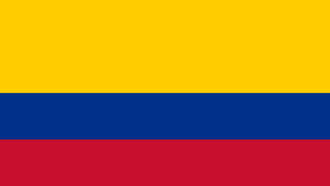


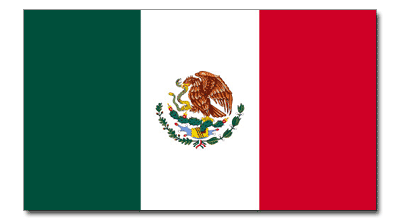

so will use:

yellow for col

green for mex

MAYBE LATER also have maps or regions and bar charts of cities for mex


(array([0.00365877, 0.0013746 , 0.00404713, 0.00895275, 0.01643382,
        0.0553926 , 0.08103979, 0.15895735, 0.28957965, 0.38056353]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'life satisfaction')

(array([0.0226416 , 0.01643382, 0.03528109, 0.05193884, 0.06609607,
        0.12475275, 0.13657117, 0.17462026, 0.19211152, 0.17955289]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'income satisfaction')

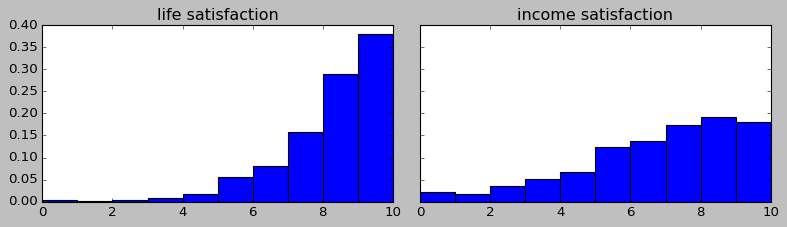

In [162]:
aut=chaComHog[['life satisfaction', 'income satisfaction',]] #subset to key vars
fig, ax = plt.subplots(1,2,sharey=True,tight_layout=True ,figsize = (10, 3))
for i,d in enumerate(aut):
  ax[i].hist(aut[d],density=True)
  ax[i].set_title(d)

(array([0.00365877, 0.0013746 , 0.00404713, 0.00895275, 0.01643382,
        0.0553926 , 0.08103979, 0.15895735, 0.28957965, 0.38056353]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'life satisfaction')

(array([0.0226416 , 0.01643382, 0.03528109, 0.05193884, 0.06609607,
        0.12475275, 0.13657117, 0.17462026, 0.19211152, 0.17955289]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'income satisfaction')

(array([0.00481875, 0.00238127, 0.00648461, 0.01482927, 0.02549388,
        0.06823408, 0.09711591, 0.16276432, 0.25689086, 0.36098705]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'health satisfaction')

(array([0.01191145, 0.00511513, 0.01237136, 0.02418061, 0.03446197,
        0.07816796, 0.10646724, 0.17199301, 0.24207181, 0.31325948]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'safety satisfaction')

(array([0.03014911, 0.01010251, 0.01691927, 0.02659254, 0.03784991,
        0.08893477, 0.12089793, 0.18411397, 0.23292998, 0.25151001]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'work/activity satisfaction')

(array([0.00524288, 0.00253968, 0.00858483, 0.01989841, 0.03508028,
        0.08934357, 0.13110775, 0.2016209 , 0.23760565, 0.26897605]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'free time satisfaction')

(array([0.0103018 , 0.00369454, 0.00910605, 0.01620898, 0.02643924,
        0.07136652, 0.09566977, 0.17129294, 0.25585353, 0.34006663]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'happy yesterday')

(array([0.30256932, 0.091454  , 0.12750008, 0.11145462, 0.07952722,
        0.08362035, 0.06388034, 0.05823377, 0.04760493, 0.03415537]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'worried yesterday')

(array([0.41622124, 0.10798492, 0.12304414, 0.09560845, 0.06497389,
        0.07121833, 0.04525433, 0.03348084, 0.02513107, 0.01708279]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'sad yesterday')

(array([0.00293826, 0.0012264 , 0.002601  , 0.00564146, 0.01104786,
        0.03859597, 0.06580171, 0.13390804, 0.2341104 , 0.5041289 ]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'things do in life worthwhile')

(array([0.00385806, 0.0021922 , 0.00542173, 0.01351089, 0.02920376,
        0.09162775, 0.13362699, 0.21440105, 0.25654849, 0.24960908]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'cantril ladder')

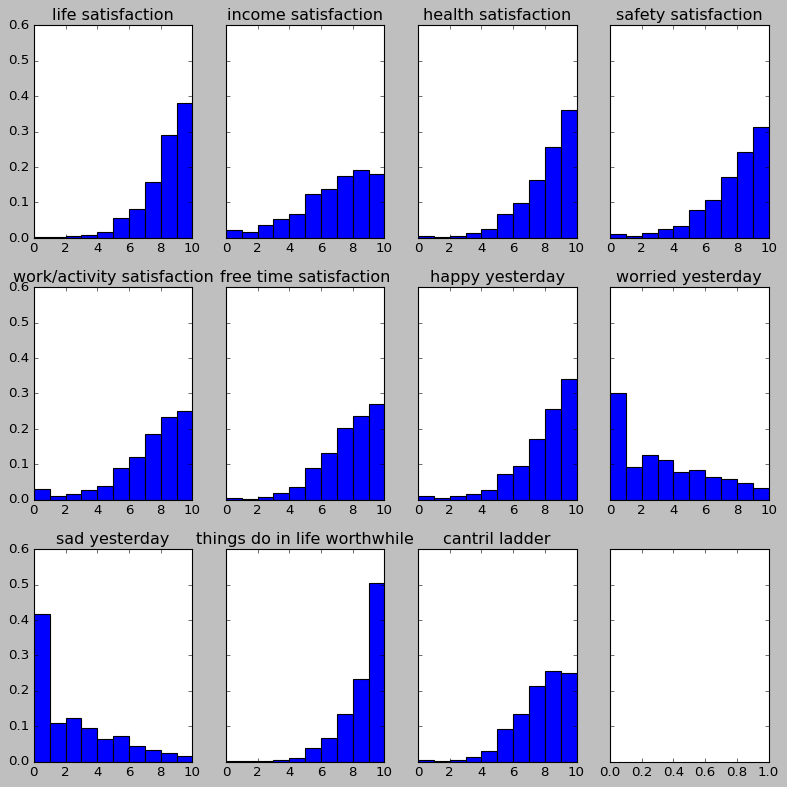

In [163]:
aut=chaComHog[['life satisfaction', 'income satisfaction', 'health satisfaction',
       'safety satisfaction', 'work/activity satisfaction',
       'free time satisfaction', 'happy yesterday', 'worried yesterday',
       'sad yesterday', 'things do in life worthwhile', 'cantril ladder']] #subset to key vars
fig, ax = plt.subplots(3,4,sharey=True,tight_layout=True ,figsize = (10, 10))
ax_flat = ax.flatten() # Flatten 2D array of axes objects #have to do it if more than 1 row and more than 1 col
for i,d in enumerate(aut):
  ax_flat[i].hist(aut[d],density=True) # Call hist on individual axes
  ax_flat[i].set_title(d)

(array([0.00612847, 0.00298402, 0.00478085, 0.00814991, 0.01129436,
        0.05194764, 0.04023615, 0.08547776, 0.22867869, 0.56032215]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

(array([0.00365877, 0.0013746 , 0.00404713, 0.00895275, 0.01643382,
        0.0553926 , 0.08103979, 0.15895735, 0.28957965, 0.38056353]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

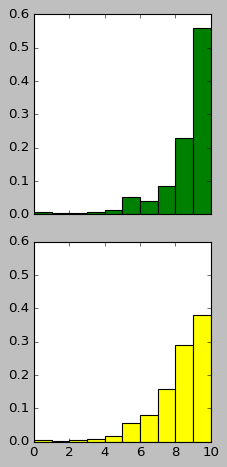

In [92]:
fig, axs = plt.subplots(2, 1, sharex=True,sharey=True, tight_layout=True, figsize = (3, 6),
    gridspec_kw={'height_ratios': [1, 1]}) #2row1col 1:3 height ratio #note indentation bc it continues from line before
axs[0].hist(tenbiare['life satisfaction'] ,alpha=1, density=True,color='green')
#axs[0].set_yticklabels('')
axs[1].hist(chaComHog['life satisfaction'],alpha=1,density=True,color='yellow') #edgecolor="black" ,color="green" histtype=u'step' alpha=.5
#axs[1].set_xlabel('mpg')
#axs[1].set_ylabel('count')

#TODO 11 steps (0-11) on x axis!!!!

(array([0.00612847, 0.00298402, 0.00478085, 0.00814991, 0.01129436,
        0.05194764, 0.04023615, 0.08547776, 0.22867869, 0.56032215]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

(array([0.00365877, 0.0013746 , 0.00404713, 0.00895275, 0.01643382,
        0.0553926 , 0.08103979, 0.15895735, 0.28957965, 0.38056353]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

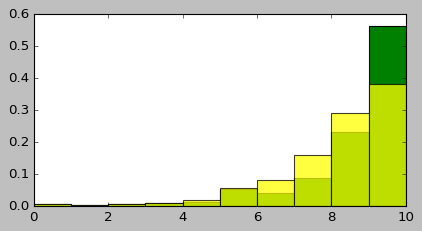

In [91]:
fig, ax = plt.subplots(figsize = (6,3))
ax.hist(tenbiare['life satisfaction'] ,alpha=1, density=True,color='green')
ax.hist(chaComHog['life satisfaction'],alpha=.75,density=True,color='yellow')

TODO: see if any interesting distributions for the presentation

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

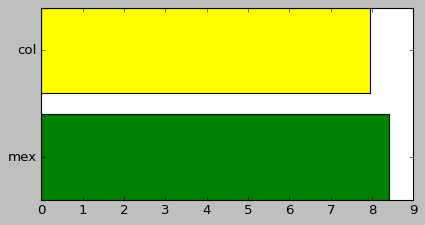

In [101]:
fig, ax = plt.subplots(figsize = (6,3))
ax.barh('mex',tenbiare['life satisfaction'].mean(),color='green')
ax.barh('col',chaComHog['life satisfaction'].mean(),color='yellow')

Text(0.5, 1.0, 'life satisfaction')

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

Text(0.5, 1.0, 'cantril ladder')

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

([<matplotlib.axis.XTick at 0x7c4d9e03cd10>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

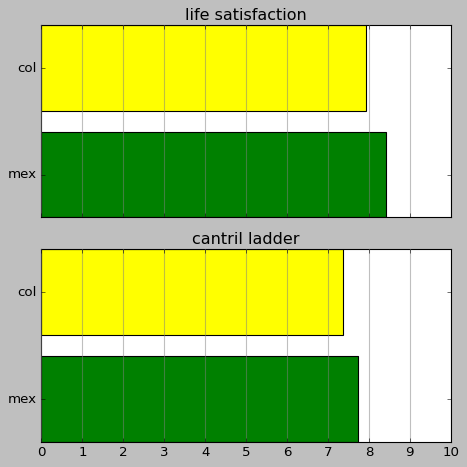

In [194]:
#later for common vars can loop like in https://colab.research.google.com/github/theaok/vis/blob/main/all.ipynb#scrollTo=qIvZmtKSUfIe&line=1&uniqifier=1
#but here some vars are different
fig, axs = plt.subplots(2, 1, sharex=True, tight_layout=True, figsize = (6, 6))

axs[0].set_title('life satisfaction')
axs[0].barh('mex',tenbiare['life satisfaction'].mean(),color='green')
axs[0].barh('col',chaComHog['life satisfaction'].mean(),color='yellow')

axs[1].set_title('cantril ladder')
axs[1].barh('mex',tenbiare['cantril ladder'].mean(),color='green')
axs[1].barh('col',chaComHog['cantril ladder'].mean(),color='yellow')

plt.xticks(np.arange(0, 11, 1))
for i in range(0,2):
  axs[i].grid(axis='x' , color ='grey', linestyle ='-', linewidth = 1,alpha = 0.5);


Text(0.5, 1.0, 'health satisfaction')

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

Text(0.5, 1.0, 'mex public safety satisfaction or col safety satisfaction')

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

([<matplotlib.axis.XTick at 0x7c4d9eda2b40>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

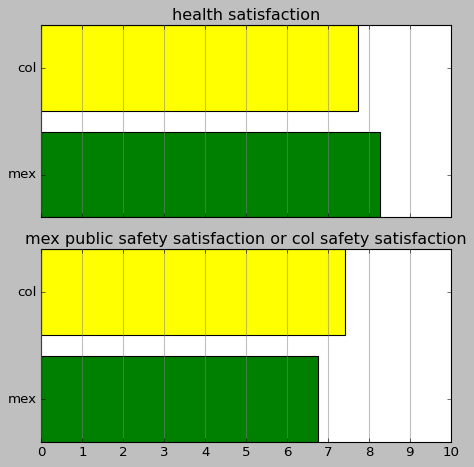

In [195]:
fig, axs = plt.subplots(2, 1, sharex=True, tight_layout=True, figsize = (6, 6))


axs[0].set_title('health satisfaction')
axs[0].barh('mex',tenbiare['health satisfaction'].mean(),color='green')
axs[0].barh('col',chaComHog['health satisfaction'].mean(),color='yellow')

axs[1].set_title('mex public safety satisfaction or col safety satisfaction')
axs[1].barh('mex',tenbiare['public safety satisfaction'].mean(),color='green')
axs[1].barh('col',chaComHog['safety satisfaction'].mean(),color='yellow')



plt.xticks(np.arange(0, 11, 1))
for i in range(0,2):
  axs[i].grid(axis='x' , color ='grey', linestyle ='-', linewidth = 1,alpha = 0.5);

comparison with raman:

yes! lifests, health, inc/std of liv;  safety/security

my work/activity is higher for mex like .3-.5 than raman, maybe merging in his dropped some obs; but in old notebook printout that i also i guess emailed ot lina and one that is submitted and viewable on easy chair it looks about the same 7 v 8.5 (guess before thye merge!)


raman didnt do cantril

TODO to presentation add stuff from raman by age etc

Text(0.5, 1.0, 'work/activity satisfaction')

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

Text(0.5, 1.0, 'mex free time amount satisfaction or col free time satisfaction')

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

Text(0.5, 1.0, 'mex standard of living or col income satisfaction')

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

([<matplotlib.axis.XTick at 0x7c4d94334f20>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

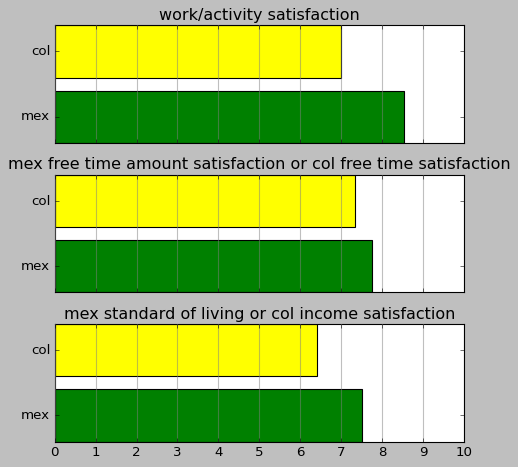

In [196]:
#tenbiare[''].value_counts()
fig, axs = plt.subplots(3, 1, sharex=True, tight_layout=True, figsize = (6, 6))

axs[0].set_title('work/activity satisfaction')
axs[0].barh('mex',tenbiare['work/activity satisfaction'].mean(),color='green')
axs[0].barh('col',chaComHog['work/activity satisfaction'].mean(),color='yellow')

axs[1].set_title('mex free time amount satisfaction or col free time satisfaction')
axs[1].barh('mex',tenbiare['free time amount satisfaction'].mean(),color='green')
axs[1].barh('col',chaComHog['free time satisfaction'].mean(),color='yellow')

axs[2].set_title('mex standard of living or col income satisfaction')
axs[2].barh('mex',tenbiare['standard of living satisfaction'].mean(),color='green')
axs[2].barh('col',chaComHog['income satisfaction'].mean(),color='yellow')

plt.xticks(np.arange(0, 11, 1))
for i in range(0,3):
  axs[i].grid(axis='x' , color ='grey', linestyle ='-', linewidth = 1,alpha = 0.5);

# sandbox